<a href="https://colab.research.google.com/github/GODxFATHER/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing Librabries

In [55]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [56]:
# # Configuration for matplotlib graphs

# matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.figsize'] = (13, 7)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'
# sns.set_style('darkgrid');

#Loading the Dataset

In [57]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Loading the csv file into pandas dataframe

# path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_p = '/content/SeoulBikeData.csv'
path_n = "/content/drive/MyDrive/DATA_FILES/SeoulBikeData.csv"
df = pd.read_csv(path_n, encoding= 'unicode_escape')

#EDA on features

In [59]:
#rows and columns in dataset
df.shape

(8760, 14)

So we have 8769 Rows and 14 features

In [60]:
#printing the first 5 rows of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [61]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Here we see the following columns are objects: -**

* **Date**
* **Season**
* **Holiday**
* **Functionaing day**

**So we to convert them into datetime data type.**

**Date convert to Datetime**

**Rest we see later**

In [62]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

#let's check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [63]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

* **The dataset doesn't contain any duplicate rows.**

##Let's Check for null values

In [64]:
#checking the missing data in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **The dateset dont't have null values**

In [65]:
#dataset descriptive statistics

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [66]:
#dataset columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [67]:
#renaming dataset columns
bike_df = df.rename( columns = { "Rented Bike Count":"Rented_Bike_Count",
                   "Temperature(°C)":"Temperature",
                   "Humidity(%)":"Humidity",
                   "Wind speed (m/s)":"Wind_speed",
                   "Visibility (10m)":"Visibility",
                   "Dew point temperature(°C)":"Dew_point_temperature",
                   "Solar Radiation (MJ/m2)":"Solar_Radiation",
                   "Rainfall(mm)":"Rainfall",
                   "Snowfall (cm)":"Snowfall",
                   "Functioning Day":"Functioning_Day" } )
bike_df.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [68]:
#year columns
name_bike_df = bike_df.copy()
name_bike_df['year'] = name_bike_df['Date'].dt.year
#month column 
name_bike_df['month'] = name_bike_df['Date'].dt.month_name() 
#day columns
name_bike_df['day'] = name_bike_df['Date'].dt.day
#weekday columns
name_bike_df['weekday'] = name_bike_df['Date'].dt.day_name() 
#quarter columns
# name_bike_df['quarter'] = name_bike_df['Date'].dt.quarter   
 

##Let's explore Coloumns

##Univariate

In [69]:
name_bike_df.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,12,Thursday


In [70]:
# Numeical features

numerical_features = name_bike_df.describe().columns
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'day'],
      dtype='object')

In [71]:
# Categorical features

categorical_features = name_bike_df.describe(include = "object").columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekday'], dtype='object')

<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'boxplot')

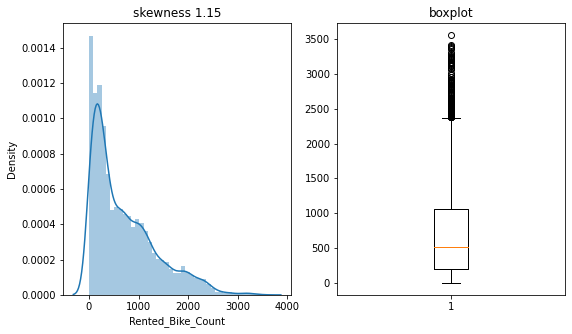

In [100]:
plt.figure(figsize=(9,5))
plt.subplot(1, 2, 1)
sns.distplot(name_bike_df.Rented_Bike_Count)
plt.title(f'skewness {round(name_bike_df.Rented_Bike_Count.skew(),2)}')

plt.subplot(1, 2, 2)
plt.boxplot(name_bike_df.Rented_Bike_Count)
plt.title('boxplot')

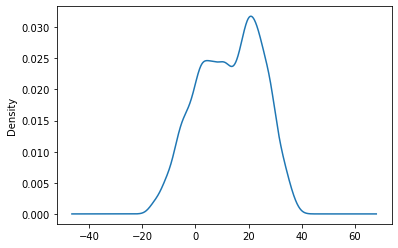

In [72]:
name_bike_df.Temperature.plot(kind = "kde")

{'boxes': [<matplotlib.lines.Line2D at 0x7f51e44a5390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51e44a5f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51e44b5410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f51e44ace90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51e44a5910>,
  <matplotlib.lines.Line2D at 0x7f51e44a5e50>]}

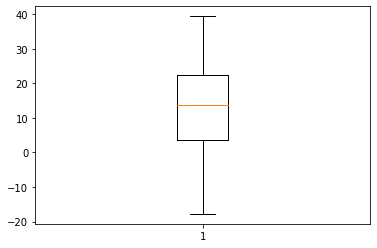

In [73]:
plt.boxplot(name_bike_df.Temperature)

##Bivariate


###1st coloumn "Date"

In [74]:
print('Dateset range from ',  name_bike_df.Date.nsmallest(1)[0], ' to ', name_bike_df.Date.nlargest(1)[8304])

Dateset range from  2017-01-12 00:00:00  to  2018-12-11 00:00:00


In [75]:
name_bike_df.Date.nsmallest(1)[0]-name_bike_df.Date.nlargest(1)[8304]

Timedelta('-698 days +00:00:00')

* **We have approx 23 months of data from jan 2017 to dec 2018**

(array([736330., 736420., 736511., 736603., 736695., 736785., 736876.,
        736968., 737060.]), <a list of 9 Text major ticklabel objects>)

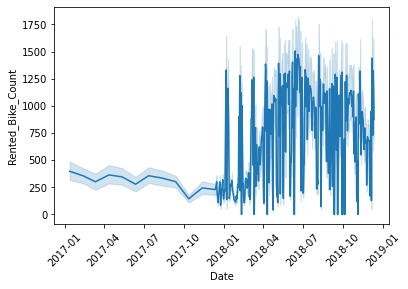

In [76]:
# bike_df["Date"]
sns.lineplot(x = name_bike_df.Date, y = name_bike_df.Rented_Bike_Count)
plt.xticks(rotation = 45)

* **we can see rent bike count suddenly increse from jan 2018**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

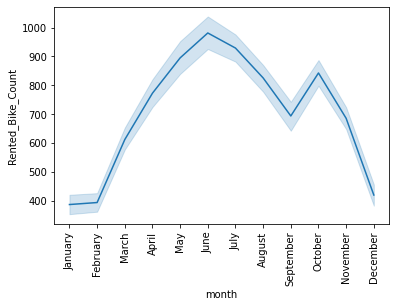

In [77]:
# by month
sns.lineplot(x = name_bike_df.month, y = name_bike_df.Rented_Bike_Count)
plt.xticks(rotation = 90)

* **From November to febrary renting bike decrease and June to September also**

* **from February to June is sudden rise in renting and September to Octuber also** 

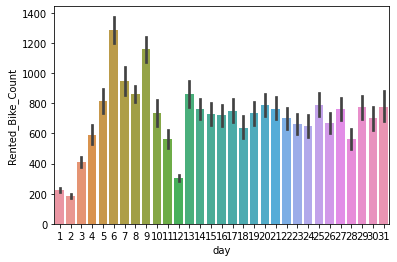

In [78]:
# by day
sns.barplot(x = name_bike_df.day, y = name_bike_df.Rented_Bike_Count)

* **From 12 to 30 the renting bike is consolidation**

* **There is increase in renting in first 7 days**

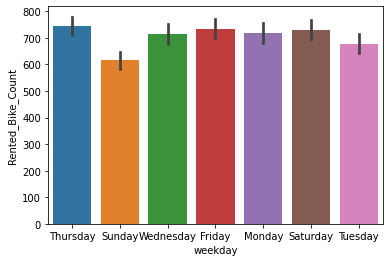

In [79]:
sns.barplot(x = name_bike_df.weekday , y = name_bike_df.Rented_Bike_Count )

* **Sunday have lowest renting**
* **from Monday to Friday have high renting**

### 2nd column Rented_Bike_Count

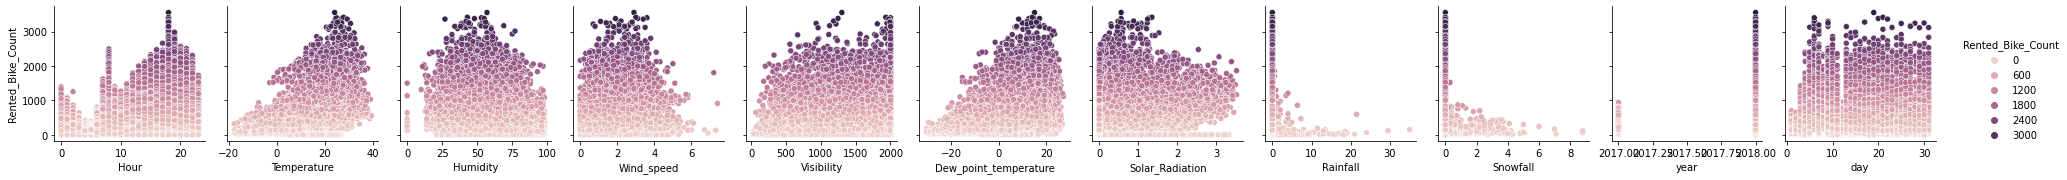

In [80]:
sns.pairplot(data = name_bike_df, hue="Rented_Bike_Count" , y_vars="Rented_Bike_Count") 

* **PLOT We like to see Count vs hour**
* **high Bike rent happen between 5 deg to 35 deg**
* **Renter prefer renting when Humidity is between 20% to 90%**
* **renter dont like biking when windspeed is higher then 4.8Km\hr**
* **Renter don't prefer renting in rainfall and snowfall**
* ****

###3rd column hour

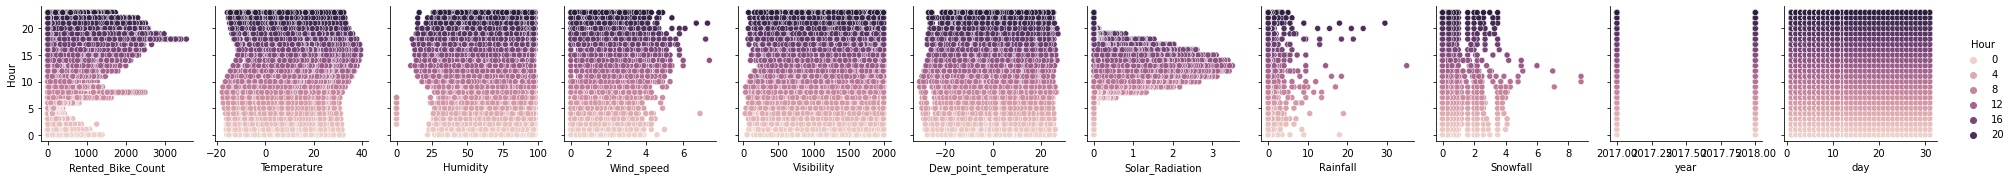

In [81]:
sns.pairplot(data = name_bike_df, hue="Hour", y_vars="Hour") 

* **tempreture,Windspeed,solar radition is higher in daylight then night**
* **Humidity is less between daylight then night**


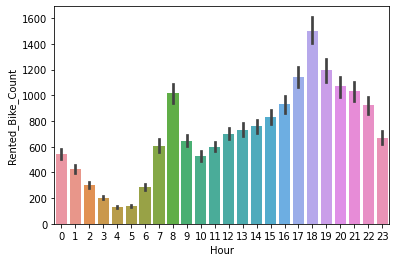

In [82]:
sns.barplot(x = name_bike_df.Hour, y = name_bike_df.Rented_Bike_Count)

* **we see that**
** **5-8 bike increase beacuse WORKER rent bike**
** **10-18 renting increaase sue to**
** **17-18 is high beaacuse worker use them and also people use to wander/cycle**

* ****

###4th column temperature 

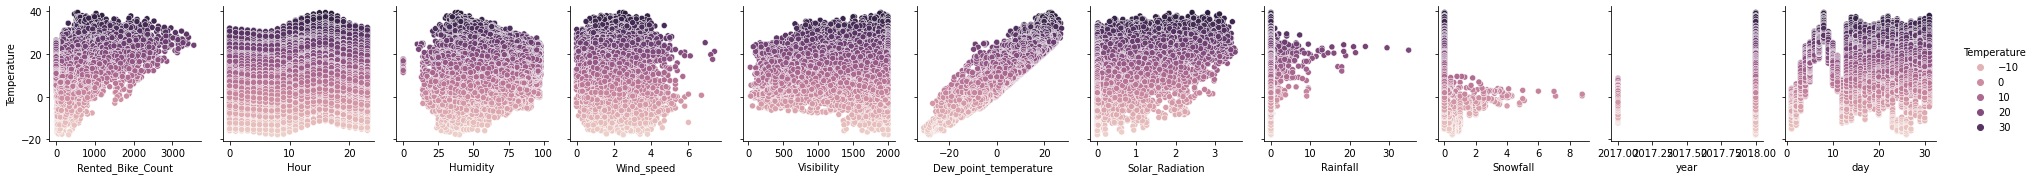

In [83]:
sns.pairplot(data = name_bike_df, hue="Temperature", y_vars="Temperature") 

In [84]:
print('Tempreture range from ',  name_bike_df.Temperature.nsmallest(1)[1352], ' to ', name_bike_df.Temperature.nlargest(1)[5848])

Tempreture range from  -17.8  to  39.4


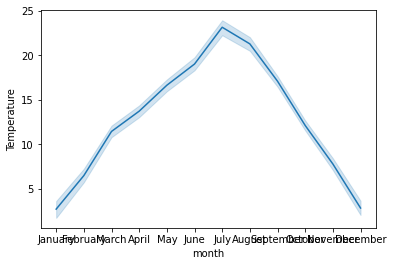

In [85]:
sns.lineplot(x = name_bike_df.month , y = name_bike_df.Temperature )

###5th column temperature Humidity

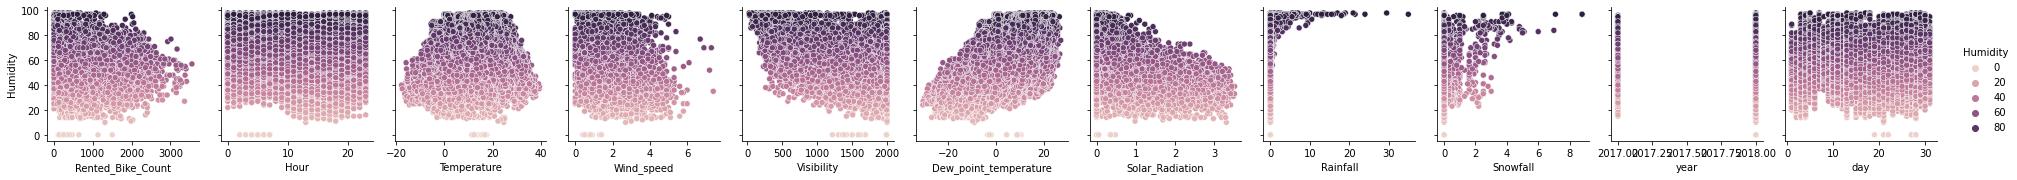

In [86]:
 sns.pairplot(data = name_bike_df, hue="Humidity", y_vars="Humidity") 

###6th column temperature Wind_speed

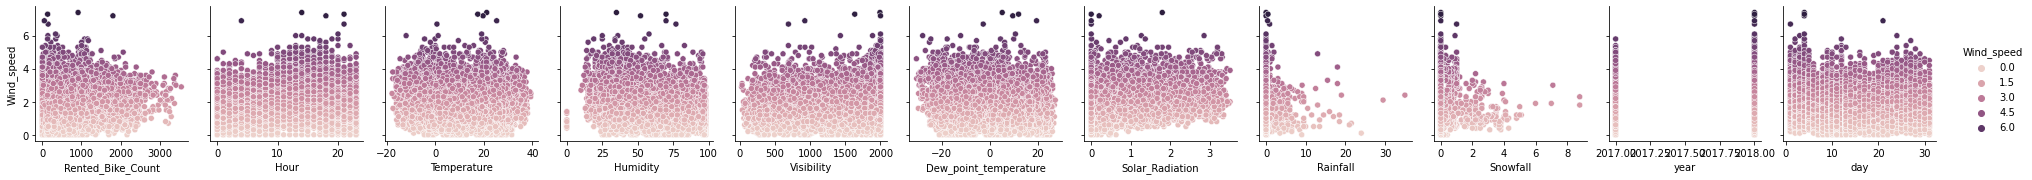

In [87]:
sns.pairplot(data = name_bike_df, hue="Wind_speed", y_vars="Wind_speed") 

###7th column Dew_point_temperature

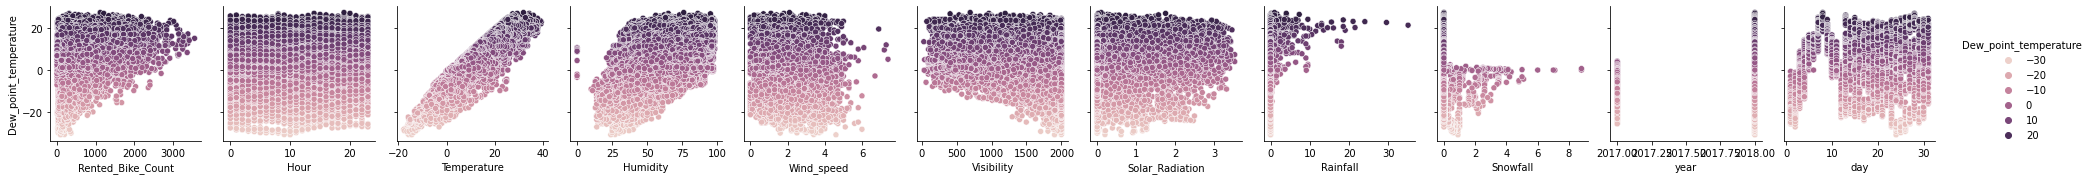

In [88]:
sns.pairplot(data = name_bike_df, hue="Dew_point_temperature", y_vars="Dew_point_temperature") 

###8th column Solar_Radiation

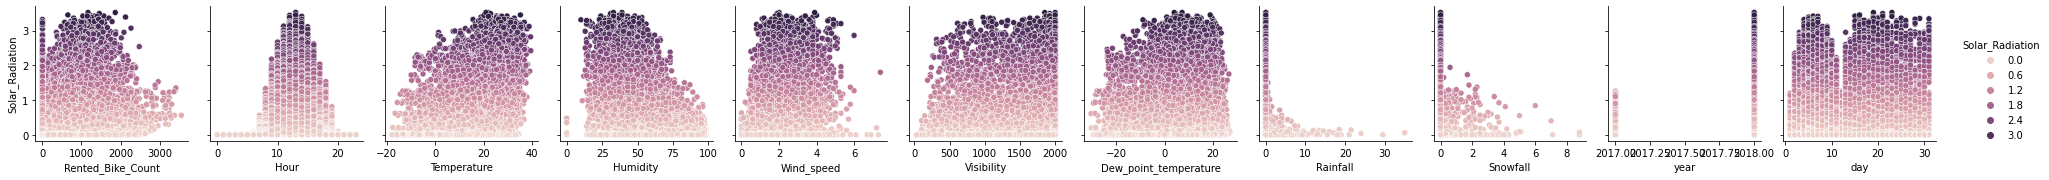

In [89]:
sns.pairplot(data = name_bike_df, hue="Solar_Radiation", y_vars="Solar_Radiation") 

###9th column Rainfall

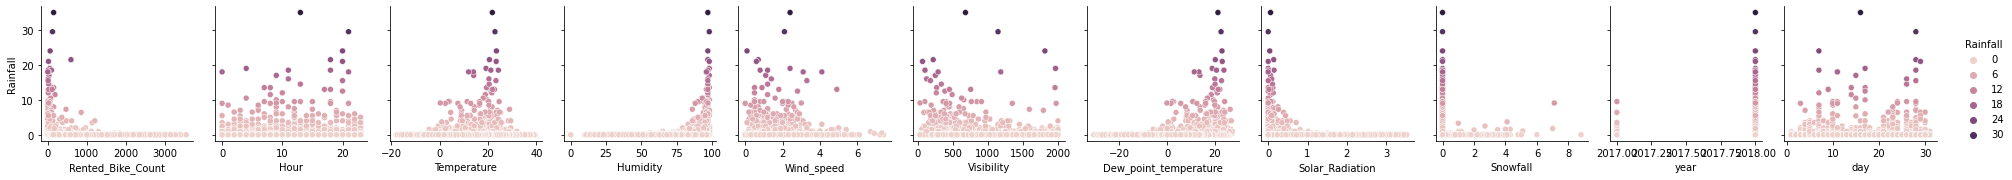

In [90]:
 sns.pairplot(data = name_bike_df, hue="Rainfall", y_vars="Rainfall") 

###10th column Snowfall

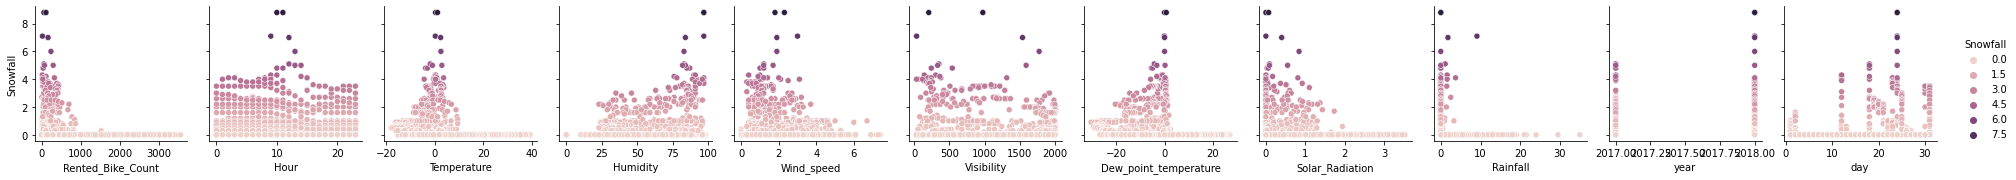

In [91]:
 sns.pairplot(data = name_bike_df, hue="Snowfall", y_vars="Snowfall") 

###11th column Seasons

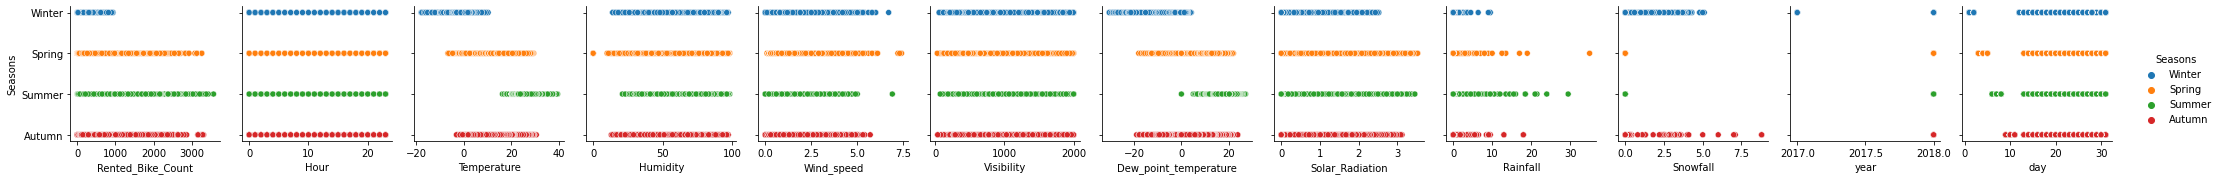

In [92]:
 sns.pairplot(data = name_bike_df, hue="Seasons", y_vars="Seasons") 

###12th column Holiday

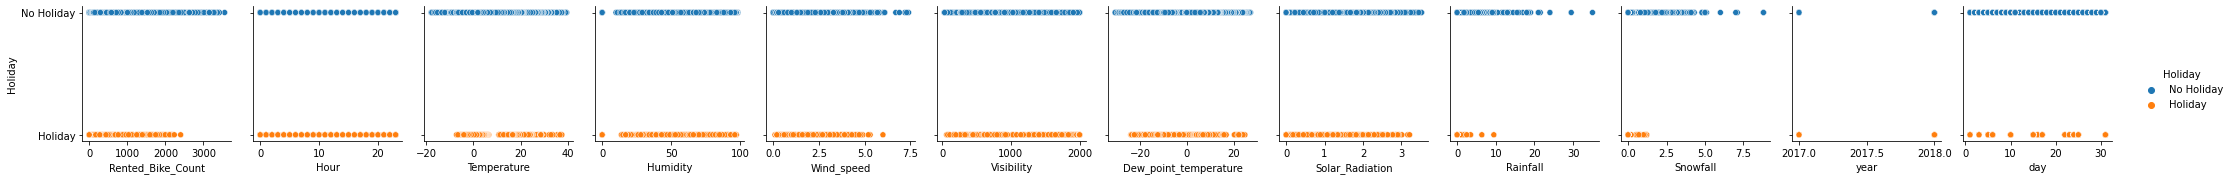

In [93]:
 sns.pairplot(data = name_bike_df, hue="Holiday", y_vars="Holiday") 

###13th column Functioning_Day

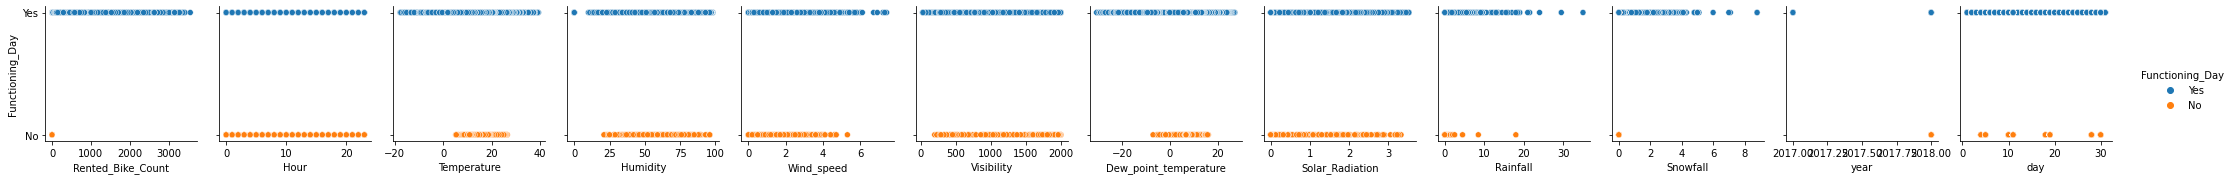

In [94]:
 sns.pairplot(data = name_bike_df, hue="Functioning_Day", y_vars="Functioning_Day") 

In [95]:
name_bike_df.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,12,Thursday
